In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/Eventlog/'


ls: cannot access '/content/drive/My Drive/Eventlog/': No such file or directory


In [0]:
!pip install pm4py

In [0]:
#Importing library to read log file
from pm4py.objects.log.importer.xes import factory as xes_import_factory

import pandas as pd


## loading xes file and reading the file

In [0]:
#File path
filename = '/content/drive/My Drive/Eventlog/Examplebadjulian.xes'
log = xes_import_factory.apply(filename)

## converting xes to csv and reading the file using pandas

In [0]:
from pm4py.objects.log.exporter.csv import factory as csv_exporter

filename = "/content/drive/My Drive/Eventlog/Example_xes_csv1.csv"

csv_exporter.export(log, filename )

In [0]:
filename =  "/content/drive/My Drive/Eventlog/Example_xes_csv1.csv"

df = pd.read_csv(filename)

In [356]:
df.head()

case:concept:name  ...             time:timestamp
0                 88  ...  2013-03-17 17:56:00-05:00
1                 88  ...  2013-03-18 17:56:00-05:00
2                 88  ...  2013-03-19 17:56:00-05:00
3                 88  ...  2013-03-20 17:56:00-05:00
4                 88  ...  2013-03-21 17:56:00-05:00

[5 rows x 4 columns]

## Function to convert single event to combined event

In [0]:
def modify_data(df_eve,unique_id):
  
  case_id = []
  activity_id = []
  complete_time_stamp = []
  lifecycle_transition = []

  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    for n in range(len(row_filter)):
      case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
    
    case_id.append(row_filter.loc[row_filter['case:concept:name']==i,'case:concept:name'][n])
  
  
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    complete_time_stamp.append(row_filter.loc[row_filter['case:concept:name']==i,'time:timestamp'][n])
    
    
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
    
    for n in range(len(row_filter)):
      lifecycle_transition .append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
    lifecycle_transition.append(row_filter.loc[row_filter['case:concept:name']==i,'lifecycle:transition'][n])
    
  
  for i in range(1,len(unique_id)+1):
  
    row_filter = df_eve.loc[df_eve['case:concept:name']==i,:]
    row_filter  = row_filter.reset_index(drop=True)
  
    activity_id.append('start')
    for n in range(len(row_filter)-1):
      activity_id.append(row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n]+row_filter.loc[row_filter['case:concept:name']==i,'concept:name'][n+1])
    
    activity_id.append('end')
  
  
  dic_data = {'case:concept:name':case_id,'concept:name':activity_id,'lifecycle:transition':lifecycle_transition,'time:timestamp':complete_time_stamp, }
  df_modified = pd.DataFrame(dic_data)
  
  return df_modified

In [0]:
unique_id = df["case:concept:name"].unique()
modified_csv = modify_data(df,unique_id)

In [0]:
modified_csv.to_csv('/content/drive/My Drive/apps/Maryam/Eventlog//modified.csv',index=True)

# Exploring  PNML file

In [359]:
import os
from pm4py.objects.petri.importer import pnml as pnml_importer

filename = '/content/drive/My Drive/Eventlog/Examplejulianchanges.pnml'
#filename = '/content/drive/My Drive/apps/Maryam/Eventlog/Examplejulianchanges.pnml'

net, initial_marking, final_marking = pnml_importer.import_net(filename)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated function import_net.
  import sys


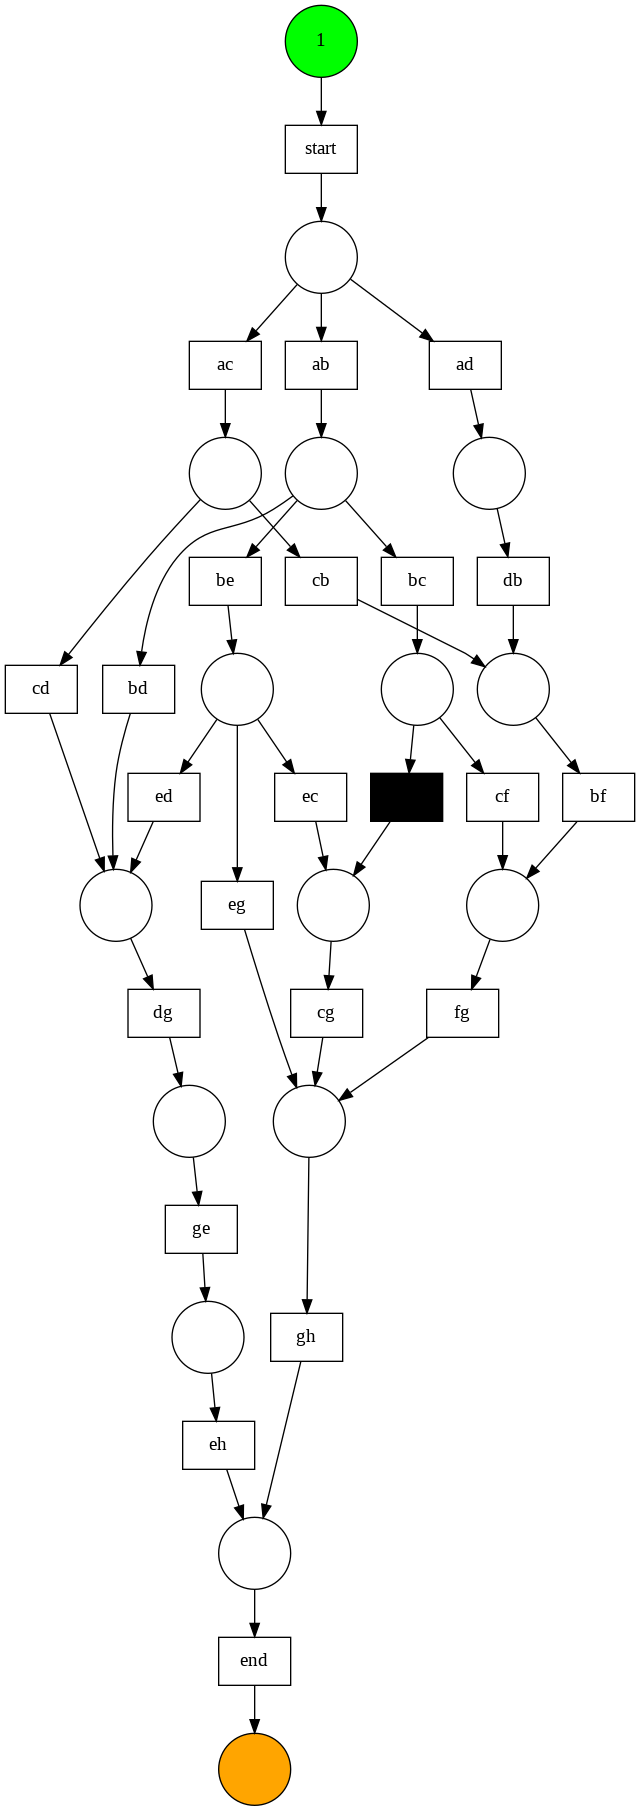

In [360]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

In [0]:
from pm4py.objects.petri import semantics

transitions = semantics.enabled_transitions(net, initial_marking)

In [0]:
place = net.places
transitions = net.transitions
arc = net.arcs

## Token replay

In [0]:
# This functions gives places which goes to transitions


def trans_in(trans_inputs):
  import re
  trainsition_input = []
  place_out = []
  arc_s = str(trans_inputs)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_input.append(arc_f[i][1][1:])
    place_out.append(arc_f[i][0])
    
  return place_out,trainsition_input

  
trans_inputs = []
for place in net.places:
  
  for arc in place.out_arcs:
    trans_inputs.append(arc)

In [0]:
# This function gives transitions output which goes to places

def trans_out(trans_out):
  import re
  trainsition_output = []
  place_in = []
  arc_s = str(trans_out)
  arc_clean = re.sub('[^A-Za-z0-9,->]+', '', arc_s)
  arc_f = arc_clean.split(",")
  
  for i in range(len(arc_f)):
    arc_f[i]=arc_f[i][1:]
    arc_f[i] = arc_f[i].split("->")
    trainsition_output.append(arc_f[i][0]) 
    place_in.append(arc_f[i][1][1:])
    
  return trainsition_output,place_in 
  
transitions_out = []
for trans in transitions:
#    trans_unique_name[trans.name]= trans.label
    for arc in trans.out_arcs:
        transitions_out.append(arc)

In [0]:
# Removing "start" and "end" event from dataset
df_csv = modified_csv[modified_csv.loc[:,"concept:name"] !="start"]
df_filter = df_csv[df_csv.loc[:,"concept:name"] !="end"]

In [0]:
def specialFiring(event,trans_output,place_input,place_output,trans_input):
  
  place_trans = []
  trans_place = []
  
  # Getting 
  for trans , place in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    if event  == place[3]:
      place_trans.append(place[2])
 
    if event  == place[0]:
      trans_place.append(place[1])
      
  # Consuming token
  for i in place_trans:
    place_tokens[i] = 0
    pmcr["c"] +=2
      
  # Producing tokens
  for i in trans_place:
    place_tokens[i] = 1
    pmcr["p"] +=2

      
      

In [0]:
# This function is to check hidden transition

def checking_hidden_transition(event,trans_place,hidden_trans):
  trans_temp = []

  # Getting connection from place to transition
  for i in range(len(trans_place)):
    for event in range(len(place_output)):
      if trans_place[i] == place_output[event]:
        trans_temp.append(trans_input[event])

  # Checking whether a transition hidden transition or not
  hiddenTrans = []
  for trans in trans_temp:
    if trans in hidden_trans:
      hiddenTrans.append(trans)

  if len(hiddenTrans)==1: 
    for i in  range(len(trans_output)):
       if hiddenTrans[0] == trans_output[i]:
          place_tokens[place_output[trans_input.index(hiddenTrans[0])]] = 0
          # Put a token
          token = place_input[i]
          place_tokens[token] =1
          # Enable a transition next to hidden transition
          tran = trans_input[place_output.index(token)]
          EnabledTransitions[tran] = 1
        


   
 

In [0]:
# This is for transition firing
def transFiring(event,place_trans,trans_place,hidden_trans):
  
  #Consuming token
  if len(place_trans)==1:

    place_tokens[place_trans[0]] = 0
    pmcr["c"] +=1

  elif len(place_trans) > 1:
    for i in place_trans:
      place_tokens[i] = 0
      pmcr["c"] +=1

  
  # Producing token
  if len(trans_place)==1:
    place_tokens[trans_place[0]] = 1
    pmcr["p"] +=1
    
  else:
    for i in trans_place:
      place_tokens[i] = 1
      pmcr["p"] +=1
      
  # disable the transition
  checking_hidden_transition(event,trans_place,hidden_trans)
      
   
  
  
  

In [0]:
# This is for checking whether a transition has enough or not
def tokensChecking(event,trans_output,place_input,place_output,trans_input,hidden_trans):
  place_trans = []
  trans_place = []
  
  for trans , place in enumerate(zip(trans_output,place_input,place_output,trans_input)):
    
    if event  == place[3]:
      place_trans.append(place[2])
      
    if event  == place[0]:
      trans_place.append(place[1])
       
  
  # only If we have one incoming place to the transitions, this condition will be success.
  if len(place_trans)==1:
    
    
    # If that place doesnt have a token, this condition will be true
    if place_tokens[place_trans[0]] == 0:
      
      # Putting one token
      place_tokens[place_trans[0]] = 1

         
      # Incressing missig value
      pmcr["m"] += 1
        
      # Firing the enabled transition
      transFiring(event,place_trans,trans_place,hidden_trans)
        
    elif place_tokens[place_trans[0]] == 1:
      transFiring(event ,place_trans,trans_place,hidden_trans)
       
  """ 
  # More than one incoming places are to the transitions     
  elif len(place_trans) > 1:
      
      
    place_values = {}
    for i in place_trans:
      place_values[i] = place_tokens[i]
        
    if True == all(x==0 for x in place_values.values()):
      transFiring(event,place_trans,trans_place,hidden_trans)
        
    else :
      h_value = max([(value, key) for key, value in place_values.items()])[0]
      for key, value in place_values.items():
        needed_tokens = h_value - place_values[key]
        place_tokens[key] = needed_tokens
        pmce["m"] += needed_tokens
        transFiring(event ,place_trans,trans_place,hidden_trans)
  """ 
              
      


In [0]:
unique_id = modified_csv['case:concept:name'].unique()


In [399]:


file = {}  


for r in range(1,len(unique_id)+1):
  
  # Getting transition to place
  trans_output, place_input = trans_out(transitions_out)
  
  # Getting place to transition
  place_output,trans_input = trans_in(trans_inputs)
  
  # Places contains zero tokens
  place_tokens = {}
  for _ in place_output:
    place_tokens[_]=0

  #To store enabled transition
  EnabledTransitions = {}
  for i in trans_output:
    EnabledTransitions[i]=0

  # Find number of hidden transition   
  hidden_trans = []
  for i in range(len(trans_output)):
    if 'n' == trans_output[i][0]:
      hidden_trans.append(trans_output[i])

  # initial pmcr values 
  pmcr = {"p":1,"m":-1,"c":1,"r":-1}
  
  trace = df_filter.loc[df_filter.loc[:,"case:concept:name"] ==11, "concept:name" ]
 
  # Getting event from trace
  for event in trace:
    if EnabledTransitions[event] == 1:
      specialFiring(event,trans_output,place_input,place_output,trans_input)
    else:
      tokensChecking(event,trans_output,place_input,place_output,trans_input,hidden_trans)
 
      
  # Calculating remaing value
  for p, value in place_tokens.items():
    if value > 0:
      print(place)
      pmcr["r"] +=value

  # Adding pcmr
  file[r]= pmcr
  break



 



n10
n10


In [401]:
place_tokens

{'n1': 0,
 'n10': 0,
 'n11': 1,
 'n12': 0,
 'n13': 0,
 'n14': 0,
 'n15': 0,
 'n2': 0,
 'n3': 1,
 'n4': 0,
 'n5': 0,
 'n6': 0,
 'n7': 0,
 'n8': 0,
 'n9': 0}

In [0]:
trace = df_filter.loc[df_filter.loc[:,"case:concept:name"] ==11, "concept:name" ]

In [400]:
file[1]

{'c': 6, 'm': 1, 'p': 6, 'r': 1}

In [333]:
trace = df.loc[df.loc[:,"case:concept:name"] ==11,: ]
trace

case:concept:name  ...             time:timestamp
132                 11  ...  2012-04-03 16:55:00-05:00
133                 11  ...  2012-04-04 16:57:00-05:00
134                 11  ...  2012-04-05 16:58:00-05:00
135                 11  ...  2012-04-06 16:59:00-05:00
136                 11  ...  2012-04-07 17:55:00-05:00
137                 11  ...  2012-04-08 17:56:00-05:00

[6 rows x 4 columns]

# Computing Fitnes 

In [278]:

def fitness(file):
  
  sum_of_c = 0
  sum_of_m = 0
  sum_of_r = 0
  sum_of_p = 0
  
  trace = {}
  
  for k, v in file.items():
    if k not in trace:
      trace[k] = {'c':0,'m':0,'p':0,'r':0}
      
      for ik, iv in trace[k].items():
        if ik == 'c' :
          trace[k][ik] = file[k][ik]  
        elif ik == 'm':
          trace[k][ik] = file[k][ik]
        elif ik == 'p':
          trace[k][ik] = file[k][ik] 
        else :
          trace[k][ik] = file[k][ik]
 
  
  for k, v in trace.items():

    for ik, iv in v.items():
      if ik == 'c' :
        sum_of_c += v[ik]
      elif ik == 'm':
        sum_of_m += v[ik]
      elif ik == 'p':
        sum_of_p += v[ik]
      else :
        sum_of_r += v[ik]
        
  fitness = 1/2 * (1-sum_of_m/sum_of_c) + 1/2 *(1-sum_of_r/sum_of_p)
  
  result = '%.2f' % fitness + ' %'
        
  return result 
 
  
result = fitness(file)
result

'0.94 %'